In [2]:
import nltk
import os
import pandas as pd
import re

In [3]:
from nltk.corpus import movie_reviews as mr

In [4]:
import tweepy as tw

In [5]:
# You need to put your own keys by creating tweeter developer account
# please refer: https://developer.twitter.com/en/docs/tutorials/step-by-step-guide-to-making-your-first-request-to-the-twitter-api-v2
ACCESS_TOKEN=''
ACESS_TOKEN_SECRET=''
CONSUMER_API_KEY=''
CONSUMER_API_SECRET=''

In [6]:
# Create an authentication object
my_auth_obj = tw.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)

# Set access token to auth object
my_auth_obj.set_access_token(ACCESS_TOKEN, ACESS_TOKEN_SECRET)

# Create an API oject to get tweets using authentication oject
my_api = tw.API(my_auth_obj)

In [7]:
# remove imojies
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [8]:
# Remove retweetes
my_tweets = my_api.home_timeline(tweet_mode = "extended", include_rts=False)

Unexpected parameter: include_rts


In [9]:
import re
my_tweets_lst = []
for tweet in my_tweets:
    if tweet.lang == "en":
        my_tweets_lst.append(re.sub(r'(https://t.co/\w{10})|(@[^\s]+)', '',remove_emoji(tweet.full_text)))
#     print(tweet.text)
#     print(tweet.created_at, '\n', tweet.user.screen_name, '\n', tweet.user.location)
my_tweets_lst

# r' https://t.co/\w{10}'

['The  Preoperative Diffuse #Glioma MRI Dataset     #BrainTumor #AI #ML ',
 'Congratulations to our fellow  and collaborator Julian Posada.\n\n ',
 'We’re working with  to expand their facility in Ottawa – which will help Canada transition to the next generation of 5G wireless technology, create over 340 good jobs, and provide students with co-op and internship opportunities. More details here:  ',
 'CNN models slightly outperformed visual transformer models on diagnosis on chest and upper extremity radiographs     #MSKRad #DeepLearning #AI ',
 'AI AGENTS | NonFungibleAI.Eth \n\nOwnership of artificial intelligence via NFTs is obvious.\n\n elevates the game to the next level:\n\nWeb3 AI Agents X AI Nodes = Decentralized AI\n\n\n\n#AGI #ArtificialIntelligence #NFT #NFTs #NonFungibleAI ',
 'MLOps Course - Made With ML\n\nGoku Mohandas : \n\n#ArtificialIntelligence #DeepLearning #MachineLearning ',
 'PDEBENCH: An Extensive Benchmark for Scientific Machine Learning\n\nTakamoto et al.: \n\n

In [10]:
remove_emoji(my_tweets_lst[0])

'The  Preoperative Diffuse #Glioma MRI Dataset     #BrainTumor #AI #ML '

In [11]:
len(my_tweets_lst)

8

In [12]:
# df=pd.DataFrame(my_tweets_lst)
# df

# Data Representation - Word level

# 1. Convert to lowecase

In [13]:
lower_my_tweets_lst=[]
for tw in my_tweets_lst:
    lower_my_tweets_lst.append(tw.lower())

lower_my_tweets_lst
    

['the  preoperative diffuse #glioma mri dataset     #braintumor #ai #ml ',
 'congratulations to our fellow  and collaborator julian posada.\n\n ',
 'we’re working with  to expand their facility in ottawa – which will help canada transition to the next generation of 5g wireless technology, create over 340 good jobs, and provide students with co-op and internship opportunities. more details here:  ',
 'cnn models slightly outperformed visual transformer models on diagnosis on chest and upper extremity radiographs     #mskrad #deeplearning #ai ',
 'ai agents | nonfungibleai.eth \n\nownership of artificial intelligence via nfts is obvious.\n\n elevates the game to the next level:\n\nweb3 ai agents x ai nodes = decentralized ai\n\n\n\n#agi #artificialintelligence #nft #nfts #nonfungibleai ',
 'mlops course - made with ml\n\ngoku mohandas : \n\n#artificialintelligence #deeplearning #machinelearning ',
 'pdebench: an extensive benchmark for scientific machine learning\n\ntakamoto et al.: \n\n

In [14]:
# Spliting the tweets
t1 = lower_my_tweets_lst[0]
t2 = lower_my_tweets_lst[1]
t3 = lower_my_tweets_lst[2]
t4 = lower_my_tweets_lst[3]
t5 = lower_my_tweets_lst[4]
t6 = lower_my_tweets_lst[5]
t7 = lower_my_tweets_lst[6]
t8 = lower_my_tweets_lst[7]

In [15]:
print(t1)
print(t2)
print(t3)
print(t4)
print(t5)
print(t6)
print(t7)
print(t8)

the  preoperative diffuse #glioma mri dataset     #braintumor #ai #ml 
congratulations to our fellow  and collaborator julian posada.

 
we’re working with  to expand their facility in ottawa – which will help canada transition to the next generation of 5g wireless technology, create over 340 good jobs, and provide students with co-op and internship opportunities. more details here:  
cnn models slightly outperformed visual transformer models on diagnosis on chest and upper extremity radiographs     #mskrad #deeplearning #ai 
ai agents | nonfungibleai.eth 

ownership of artificial intelligence via nfts is obvious.

 elevates the game to the next level:

web3 ai agents x ai nodes = decentralized ai



#agi #artificialintelligence #nft #nfts #nonfungibleai 
mlops course - made with ml

goku mohandas : 

#artificialintelligence #deeplearning #machinelearning 
pdebench: an extensive benchmark for scientific machine learning

takamoto et al.: 

#artificialintelligence #deeplearning #machine

# 2. Tokenize

In [18]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [27]:
# nltk.download('punkt')

# Sentence tokenize

In [165]:

for lower_tw in lower_my_tweets_lst:
    sent = sent_tokenize(lower_tw)
    sent

['#cnn model accurately assessed changes in patients undergoing routine posttreatment mri      #braintumor #ml #machinelearning #esur22']

['whitelist is live!',
 '8 "ai magical dragon"  wl spots for each crypto ai art  owned!',
 'crypto ai art holders must confirm their intention to mint (free + transaction fee) and provide one (1) new wallet per crypto ai art owned.',
 '#aidragon #montrealai #nft']

['comparing visual #transformers with cnns on chest and upper extremity radiographs     #visiontransformers #mskrad #ml']

['just over a year ago, we announced a historic investment in the future of hamilton’s  plant – an investment that is good news for workers, for our economy, and for our environment.',
 'today, we broke ground on the project and kicked off construction:']

['patient-specific hip arthroplasty dislocation risk calculator: an explainable multimodal #machinelearning–based approach     #hipreplacement #deeplearning #ml']

['pizzas, pastries, and other groceries –  has it all.',
 'we stopped by today, ahead of small business week, to thank the workers for being such an important part of the community – and to grab a bite for the road, of course.',
 'thanks for the suggestion,']

['potential biases during #machinelearning model development     #deeplearning #ai #ml']

['to the workers at  training centre: thank you for building a better, stronger future.',
 'we’ll keep working to help break down barriers – because we need the next generation of workers, especially women, to take advantage of the demand that’s out there.']

# Word tokenize

In [22]:
word_tokens_lst = []
for lower_tw in lower_my_tweets_lst:
    words_tokens = word_tokenize(lower_tw)
    word_tokens_lst.append(words_tokens)
    
word_tokens_lst
#     print(words_tokens)
#     print(lower_tw)
#     for word in lower_tw:
#         words
#     ai_tokens = word_tokenize(lower_tw)
#     ai_tokens

[['the',
  'preoperative',
  'diffuse',
  '#',
  'glioma',
  'mri',
  'dataset',
  '#',
  'braintumor',
  '#',
  'ai',
  '#',
  'ml'],
 ['congratulations',
  'to',
  'our',
  'fellow',
  'and',
  'collaborator',
  'julian',
  'posada',
  '.'],
 ['we',
  '’',
  're',
  'working',
  'with',
  'to',
  'expand',
  'their',
  'facility',
  'in',
  'ottawa',
  '–',
  'which',
  'will',
  'help',
  'canada',
  'transition',
  'to',
  'the',
  'next',
  'generation',
  'of',
  '5g',
  'wireless',
  'technology',
  ',',
  'create',
  'over',
  '340',
  'good',
  'jobs',
  ',',
  'and',
  'provide',
  'students',
  'with',
  'co-op',
  'and',
  'internship',
  'opportunities',
  '.',
  'more',
  'details',
  'here',
  ':'],
 ['cnn',
  'models',
  'slightly',
  'outperformed',
  'visual',
  'transformer',
  'models',
  'on',
  'diagnosis',
  'on',
  'chest',
  'and',
  'upper',
  'extremity',
  'radiographs',
  '#',
  'mskrad',
  '#',
  'deeplearning',
  '#',
  'ai'],
 ['ai',
  'agents',
  '|',
 

In [23]:
type(words_tokens)

list

In [25]:
for sub_lst_word_token in word_tokens_lst:
    print(len(sub_lst_word_token))

13
9
45
21
40
15
20
40


In [26]:
from nltk.probability import FreqDist
fdist=FreqDist()

for sub_lst_word_token in word_tokens_lst:
    for word in sub_lst_word_token:
        fdist[word] +=1

fdist


FreqDist({'#': 18, 'and': 7, ':': 7, 'ai': 6, 'the': 5, 'to': 5, '.': 5, '’': 3, 'with': 3, 'of': 3, ...})

# 3. Stopword removal

In [37]:
# nltk.download('stopwords')

In [28]:
from nltk.corpus import stopwords as sw
stopwordsEng = sw.words('English')
stopwordsEng

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
word_tokens_lst_wo_sw = []

for sub_lst_word_token in word_tokens_lst:
    word_tokens_sub_lst_wo_sw = []
    word_tokens_lst_wo_sw.append(word_tokens_sub_lst_wo_sw)
    for word in sub_lst_word_token:
        if word not in stopwordsEng:
            word_tokens_sub_lst_wo_sw.append(word)

word_tokens_lst_wo_sw


[['preoperative',
  'diffuse',
  '#',
  'glioma',
  'mri',
  'dataset',
  '#',
  'braintumor',
  '#',
  'ai',
  '#',
  'ml'],
 ['congratulations', 'fellow', 'collaborator', 'julian', 'posada', '.'],
 ['’',
  'working',
  'expand',
  'facility',
  'ottawa',
  '–',
  'help',
  'canada',
  'transition',
  'next',
  'generation',
  '5g',
  'wireless',
  'technology',
  ',',
  'create',
  '340',
  'good',
  'jobs',
  ',',
  'provide',
  'students',
  'co-op',
  'internship',
  'opportunities',
  '.',
  'details',
  ':'],
 ['cnn',
  'models',
  'slightly',
  'outperformed',
  'visual',
  'transformer',
  'models',
  'diagnosis',
  'chest',
  'upper',
  'extremity',
  'radiographs',
  '#',
  'mskrad',
  '#',
  'deeplearning',
  '#',
  'ai'],
 ['ai',
  'agents',
  '|',
  'nonfungibleai.eth',
  'ownership',
  'artificial',
  'intelligence',
  'via',
  'nfts',
  'obvious',
  '.',
  'elevates',
  'game',
  'next',
  'level',
  ':',
  'web3',
  'ai',
  'agents',
  'x',
  'ai',
  'nodes',
  '=',
  

In [30]:
len(word_tokens_lst_wo_sw)

8

In [31]:
for i in word_tokens_lst_wo_sw:
    print(len(i))

12
6
28
18
35
14
18
23


In [54]:
words_to_remove = ['(', ')', ',', '.', '[', ']', '``', "''",'#','=','|', ':', '_', '-', '–', '’']

In [55]:
my_own_stopwords = words_to_remove + stopwordsEng

In [56]:
# word_tokens_lst_wo_sw = []
# for sub_lst_word_token in word_tokens_lst:
#     word_tokens_sub_lst_wo_sw = []
#     word_tokens_lst_wo_sw.append(word_tokens_sub_lst_wo_sw)
#     for word in sub_lst_word_token:
#         if word not in stopwordsEng:
#             word_tokens_sub_lst_wo_sw.append(word)

# word_tokens_lst_wo_sw

word_tokens_lst_wo_sw_myown = []
for sub_lst_word_token in word_tokens_lst:
    word_tokens_sub_lst_wo_sw_myown = []
    word_tokens_lst_wo_sw_myown.append(word_tokens_sub_lst_wo_sw_myown)
    for word in sub_lst_word_token:
        if word not in my_own_stopwords:
            word_tokens_sub_lst_wo_sw_myown.append(word)

word_tokens_lst_wo_sw_myown

[['preoperative',
  'diffuse',
  'glioma',
  'mri',
  'dataset',
  'braintumor',
  'ai',
  'ml'],
 ['congratulations', 'fellow', 'collaborator', 'julian', 'posada'],
 ['working',
  'expand',
  'facility',
  'ottawa',
  'help',
  'canada',
  'transition',
  'next',
  'generation',
  '5g',
  'wireless',
  'technology',
  'create',
  '340',
  'good',
  'jobs',
  'provide',
  'students',
  'co-op',
  'internship',
  'opportunities',
  'details'],
 ['cnn',
  'models',
  'slightly',
  'outperformed',
  'visual',
  'transformer',
  'models',
  'diagnosis',
  'chest',
  'upper',
  'extremity',
  'radiographs',
  'mskrad',
  'deeplearning',
  'ai'],
 ['ai',
  'agents',
  'nonfungibleai.eth',
  'ownership',
  'artificial',
  'intelligence',
  'via',
  'nfts',
  'obvious',
  'elevates',
  'game',
  'next',
  'level',
  'web3',
  'ai',
  'agents',
  'x',
  'ai',
  'nodes',
  'decentralized',
  'ai',
  'agi',
  'artificialintelligence',
  'nft',
  'nfts',
  'nonfungibleai'],
 ['mlops',
  'course',


In [57]:
for j in word_tokens_lst_wo_sw_myown:
    print(len(j))

8
5
22
15
26
9
12
17


# Steming

In [60]:
from nltk.stem import PorterStemmer

In [61]:
poter=PorterStemmer()

In [62]:
word_tokens_lst_wo_sw_myown_stem = []

for word_tokens_sub_lst_wo_sw_myown in word_tokens_lst_wo_sw_myown:
    word_tokens_sub_lst_wo_sw_myown_stem=[]
    word_tokens_lst_wo_sw_myown_stem.append(word_tokens_sub_lst_wo_sw_myown_stem)
    for word in word_tokens_sub_lst_wo_sw_myown:
        stem_word = poter.stem(word)
        word_tokens_sub_lst_wo_sw_myown_stem.append(stem_word)
    
word_tokens_lst_wo_sw_myown_stem

[['preoper', 'diffus', 'glioma', 'mri', 'dataset', 'braintumor', 'ai', 'ml'],
 ['congratul', 'fellow', 'collabor', 'julian', 'posada'],
 ['work',
  'expand',
  'facil',
  'ottawa',
  'help',
  'canada',
  'transit',
  'next',
  'gener',
  '5g',
  'wireless',
  'technolog',
  'creat',
  '340',
  'good',
  'job',
  'provid',
  'student',
  'co-op',
  'internship',
  'opportun',
  'detail'],
 ['cnn',
  'model',
  'slightli',
  'outperform',
  'visual',
  'transform',
  'model',
  'diagnosi',
  'chest',
  'upper',
  'extrem',
  'radiograph',
  'mskrad',
  'deeplearn',
  'ai'],
 ['ai',
  'agent',
  'nonfungibleai.eth',
  'ownership',
  'artifici',
  'intellig',
  'via',
  'nft',
  'obviou',
  'elev',
  'game',
  'next',
  'level',
  'web3',
  'ai',
  'agent',
  'x',
  'ai',
  'node',
  'decentr',
  'ai',
  'agi',
  'artificialintellig',
  'nft',
  'nft',
  'nonfungibleai'],
 ['mlop',
  'cours',
  'made',
  'ml',
  'goku',
  'mohanda',
  'artificialintellig',
  'deeplearn',
  'machinelearn']

In [63]:
for k in word_tokens_lst_wo_sw_myown_stem:
    print(len(k))

8
5
22
15
26
9
12
17


# Text Similarities

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
def get_vector(*Str):
    my_text = [text for text in Str]
    
    tfidf = TfidfVectorizer()
    feature_matrix = tfidf.fit_transform(my_text)
    my_vector = feature_matrix.toarray()
    
    names =  tfidf.get_feature_names()
    return my_vector

In [76]:
t1 = " ".join(word_tokens_lst_wo_sw_myown_stem[0]
t2 = " ".join(word_tokens_lst_wo_sw_myown_stem[1]
t3 = " ".join(word_tokens_lst_wo_sw_myown_stem[2]
t4 = " ".join(word_tokens_lst_wo_sw_myown_stem[3]
t5 = " ".join(word_tokens_lst_wo_sw_myown_stem[4]
t6 = " ".join(word_tokens_lst_wo_sw_myown_stem[5]
t7 = " ".join(word_tokens_lst_wo_sw_myown_stem[6]
t8 = " ".join(word_tokens_lst_wo_sw_myown_stem[7])

str

In [78]:
vectors = get_vector(t1, t1, t3, t4, t5, t6, t7, t8)
vectors

array([[0.        , 0.        , 0.        , 0.        , 0.27150219,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.35885037, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.35885037, 0.        , 0.        ,
        0.        , 0.        , 0.35885037, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.35885037, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.30965842, 0.        , 0.        ,
        0.        , 0.        , 0.35885037, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
def get_similarity(vector):
    return cosine_similarity(vector)

In [80]:
cos_sim = get_similarity(vectors)
cos_sim

array([[1.        , 1.        , 0.02212977, 0.03807076, 0.15763466,
        0.0793058 , 0.        , 0.02488156],
       [1.        , 1.        , 0.02212977, 0.03807076, 0.15763466,
        0.0793058 , 0.        , 0.02488156],
       [0.02212977, 0.02212977, 1.        , 0.03795028, 0.07829353,
        0.08161505, 0.        , 0.32202787],
       [0.03807076, 0.03807076, 0.03795028, 1.        , 0.0584966 ,
        0.04095905, 0.0327781 , 0.06400399],
       [0.15763466, 0.15763466, 0.07829353, 0.0584966 , 1.        ,
        0.0304638 , 0.02437912, 0.05085139],
       [0.0793058 , 0.0793058 , 0.08161505, 0.04095905, 0.0304638 ,
        1.        , 0.17547221, 0.        ],
       [0.        , 0.        , 0.        , 0.0327781 , 0.02437912,
        0.17547221, 1.        , 0.03671766],
       [0.02488156, 0.02488156, 0.32202787, 0.06400399, 0.05085139,
        0.        , 0.03671766, 1.        ]])

In [81]:
# Diamentionaly reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)

cos_sim_pca = pca.fit_transform(cos_sim)
cos_sim_pca

array([[ 1.04840661, -0.05445454],
       [ 1.04840661, -0.05445454],
       [-0.51111798, -0.56411783],
       [-0.33659943,  0.12089965],
       [-0.01926632, -0.05059989],
       [-0.27549032,  0.55020971],
       [-0.44322113,  0.64789631],
       [-0.51111804, -0.59537888]])

In [82]:
pca.explained_variance_ratio_

array([0.41291686, 0.18850397])

In [83]:
n = cos_sim_pca.shape[0]
n

8

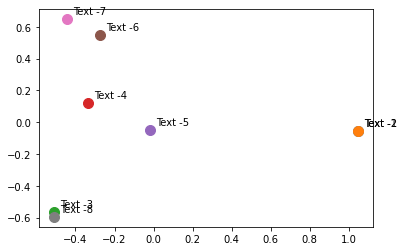

In [84]:
labels =[]
for i in range(n):
    x = cos_sim_pca[i, 0]
    y = cos_sim_pca[i, 1]
    label = 'Text -' +str(i+1)
    labels.append(label)
    plt.scatter(x,y,s =100)
    plt.text(x+0.03, y+0.03, s= label)

In [85]:
# Clustering
from sklearn.cluster import KMeans
n_clusters = 4

km = KMeans(n_clusters)
km.fit(cos_sim_pca)
print(km.labels_)
print(km.cluster_centers_)

[1 1 3 0 0 2 2 3]
[[-0.17793288  0.03514988]
 [ 1.04840661 -0.05445454]
 [-0.35935572  0.59905301]
 [-0.51111801 -0.57974835]]


In [86]:
data = cos_sim_pca
centers = km.cluster_centers_
clusters = km.labels_

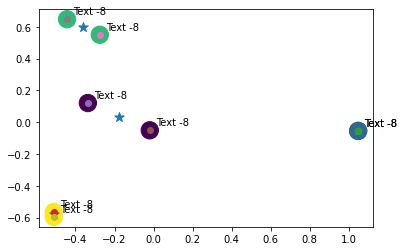

In [87]:
plt.scatter(data[:,0], data[:, 1], c=clusters, s = 300)
plt.scatter(centers[:,0], centers[:,1], s=100, marker='*')

for i in range(n):
    x= data[i, 0]
    y= data[i, 1]
    plt.scatter(x,y)
    plt.text(x+0.03, y+0.03, s= label)